In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lin(x, a, b):
    return a*x + b

height_file = open('gom_data.pickle', 'rb')
height_data = pickle.loads(height_file.read())


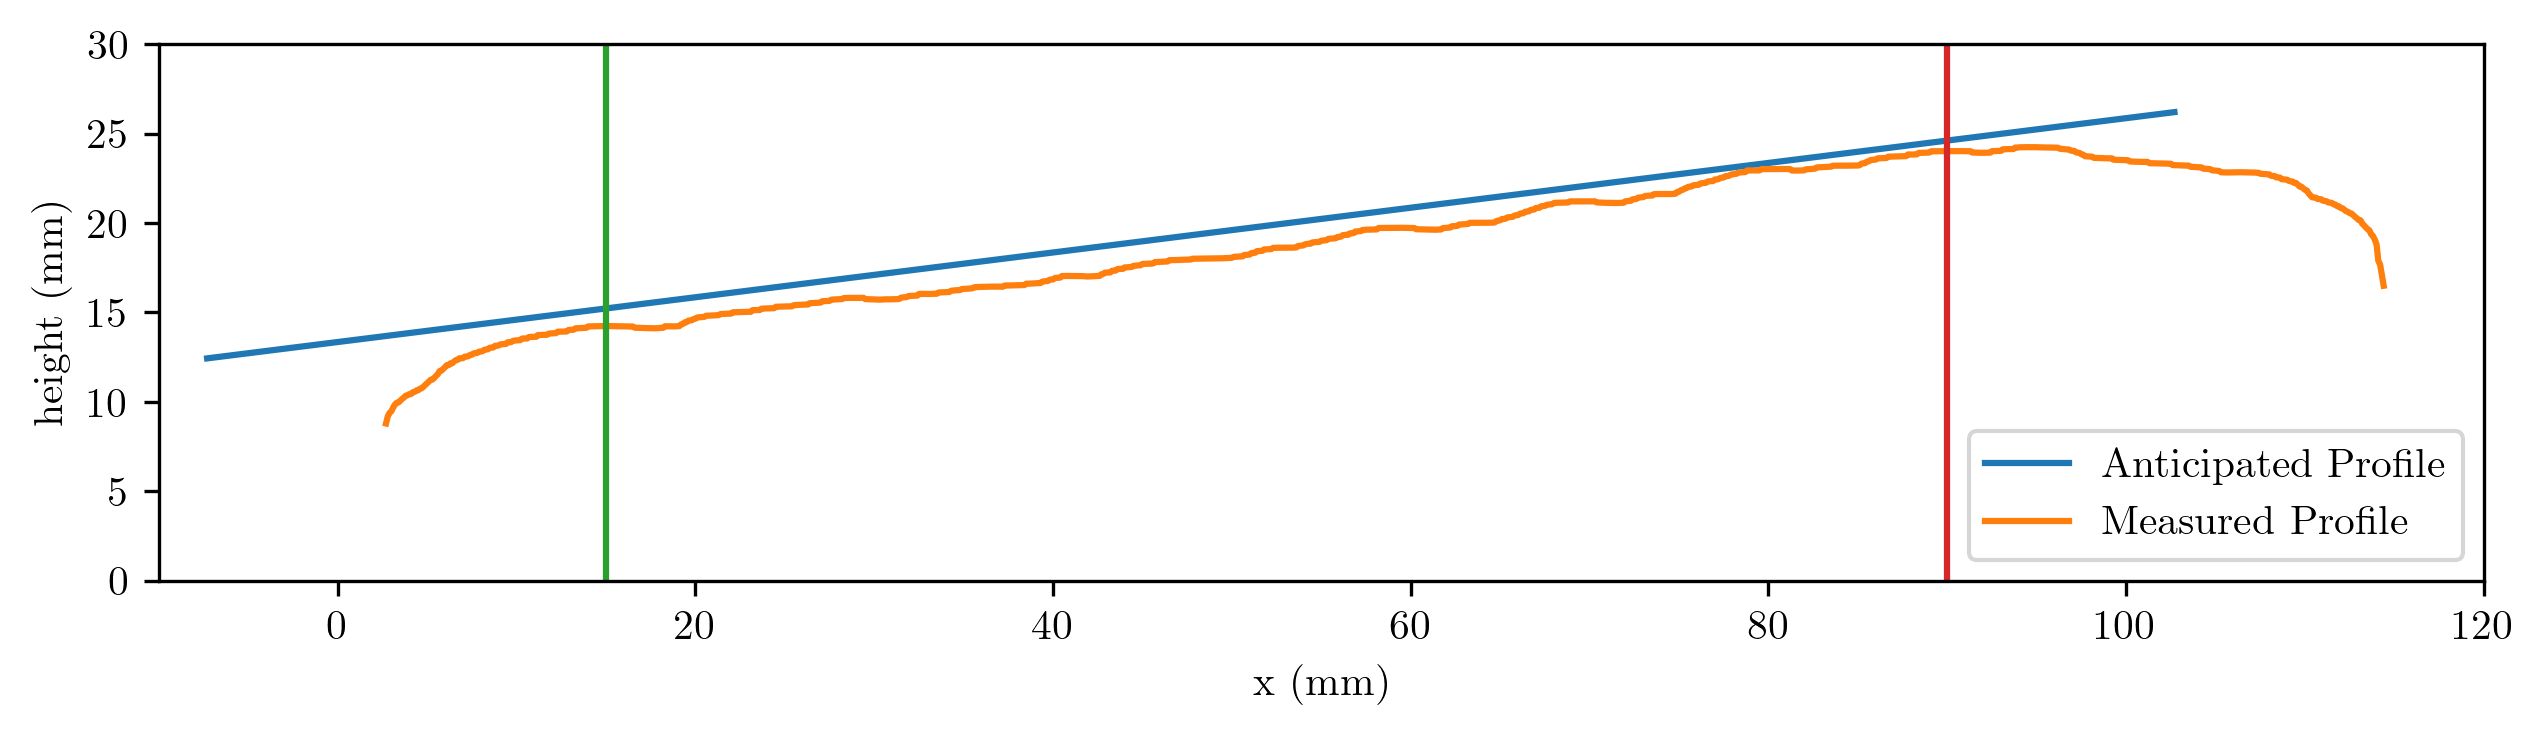

In [31]:
heights = np.array(height_data[0])
offset=2.7
x_vals = np.linspace(-10,100)

b_val = 13.6862
slope = b_val/109.3372277
x_offset = [x+offset for x in x_vals]
line = lin(x_vals, slope, b_val)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax = plt.subplots(1,1)
fig.dpi=300
ax.plot(x_offset,line)
ax.plot(heights[:,0], heights[:,1])
ax.legend(["Anticipated Profile", "Measured Profile"])
ax.set_aspect('equal')
ax.set_ylim(0,30)
ax.set_xlim(-10,120)
ax.set_xlabel("x (mm)")
ax.set_ylabel("height (mm)")
ax.plot([15, 15],[0,80])
ax.plot([90,90], [0,80])
fig.set_figwidth(10)
plt.show()

In [30]:
print(heights[123])
print(heights[0])
print(heights[873])

[15.         14.23911708]
[2.7        8.79293111]
[90.         24.02204108]


[1.53600289 1.48081357 1.4876754  1.48881757 1.49212597 1.49741051
 1.44813951 1.45564079 1.46439637 1.47271577 1.47998685 1.484644
 1.49418315 1.5015005  1.45198583 1.45934097 1.46830819 1.47392044
 1.48286317 1.49111434 1.50123834 1.44006767 1.45036133 1.457755
 1.46716226 1.47746015 1.48737753 1.5003935  1.51003003 1.52098824
 1.53050796 1.53755952 1.4598975  1.47013059 1.48209996 1.48952055
 1.50053328 1.43924944 1.45138568 1.4523229  1.46276993 1.47261316
 1.47997373 1.49014307 1.50053675 1.43315475 1.44160196 1.44684035
 1.45494876 1.46588161 1.47815013 1.48826688 1.5008335  1.51156228
 1.5192618  1.4699972  1.47538491 1.48110091 1.48678538 1.49406875
 1.50311789 1.51355686 1.51897744 1.53087346 1.47187031 1.4784891
 1.49035219 1.49262147 1.50129342 1.50438393 1.51257305 1.44623143
 1.45563995 1.46463016 1.4721467  1.48176286 1.42749434 1.42848126
 1.43618557 1.44198178 1.45293339 1.46130413 1.46766942 1.42107145
 1.42941649 1.43870753 1.45061743 1.46365489 1.47617231 1.48868973


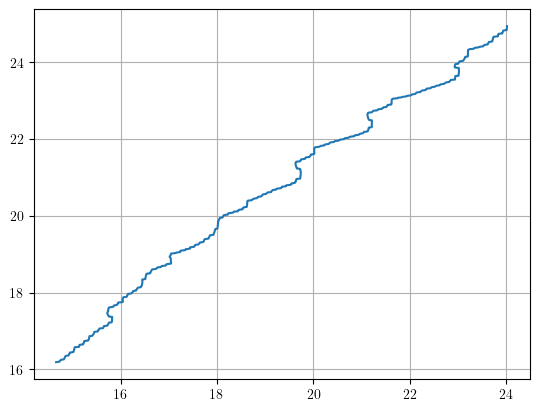

In [28]:
start_idx = 173
end_idx = 873
predic_height = lin(heights[start_idx:end_idx, 0], slope, b_val)

error=predic_height-heights[start_idx:end_idx,1]
print(error)
rms = np.sqrt(np.sum(error**2)/len(error))
print(rms)

fig,ax = plt.subplots()
ax.plot(heights[start_idx:end_idx,1],predic_height)
ax.grid()
plt.show()